In [2]:
import mnist
import matplotlib.pyplot as plt 
import numpy as np
images = mnist.train_images()
print(len(images), len(mnist.test_images()))

60000 10000


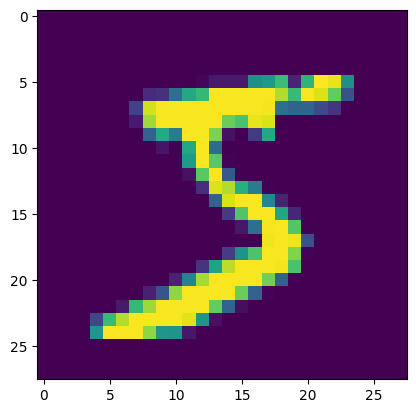

In [6]:
plt.imshow(images[0])


[[   0.  758. 2327. 1130.]
 [   0. 5932. 2909.   95.]
 [   0.  880. 6952.    0.]
 [1113. 4806.  623.    0.]]


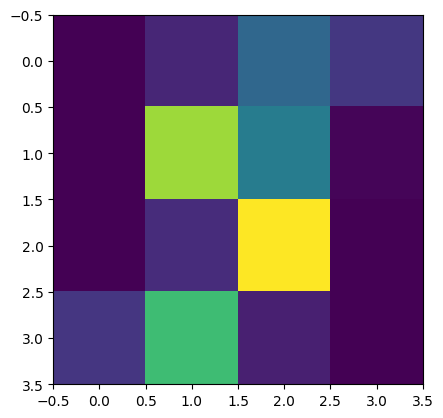

In [78]:
# each image will have 28 x 28 unit8 values, reshape into (28x28)x1 1d array 
image = images[0]
num_blocks = 4
block_size = int(image.shape[0]/num_blocks)
def reduce(image, N):
    # reduce the size of the image to block_size*block_size down from 28.28
    reduced_im = np.zeros((num_blocks,num_blocks))
    for x in range(num_blocks):
        for y in range(num_blocks):
            new = image[x * N : (x + 1) * N, y * N : (y + 1) * N]
            reduced_im[x][y] = np.sum(new)
    return reduced_im
reduced = reduce(image, block_size)
plt.imshow(reduced)
print(reduced)




[[   0.  758. 2327. 1130.]
 [   0. 5932. 2909.   95.]
 [   0.  880. 6952.    0.]
 [1113. 4806.  623.    0.]]
[[   0.  758. 2327. 1130.    0. 5932. 2909.   95.    0.  880. 6952.    0.
  1113. 4806.  623.    0.]]
11772


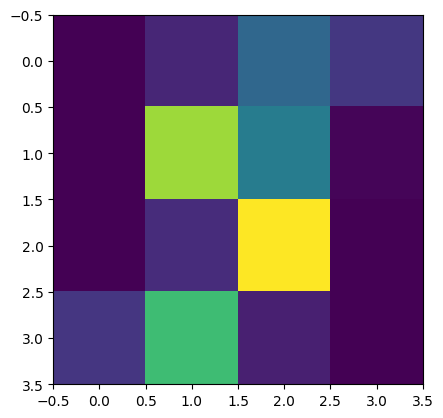

In [134]:
def sigmoid(input):
    return 1/(1+np.exp(-1*input))
    
class Agent():
    def __init__(self, image=None, num_blocks=4):
        self.image = image
        self.num_blocks = num_blocks
        self.reduced_im = np.zeros((self.num_blocks, self.num_blocks))
        self.weights = np.random.rand(self.num_blocks, self.num_blocks)
        
    def reduce(self):
        N = int(image.shape[0]/num_blocks)
        # reduce the size of the image to block_size*block_size down from 28.28
        for x in range(self.num_blocks):
            for y in range(self.num_blocks):
                new = self.image[x * N : (x + 1) * N, y * N : (y + 1) * N]
                self.reduced_im[x][y] = np.sum(new)

    def dot(self):
        return int(np.sum(agent.weights * agent.reduced_im))

    def flatten(self):
        return np.reshape(self.reduced_im, (1,self.reduced_im.size))
        


    def forward(self):
        return 0
        
    def plot(self):
        plt.imshow(self.reduced_im)

    def rmse(self, reference_image):
        pass

agent = Agent(image)
agent.reduce()
print(agent.reduced_im)
reduced = agent.reduced_im
print(agent.flatten())
agent.plot()
print(agent.dot())


In [199]:
def step(input):
    return 1 if input >=0 else 0

def sigmoid(input):
    return 1/(1+np.exp(-1*input))
class Neuron:
    def __init__(self, input = 0 ):
        self.input = input
        self.bias = 0 
        self.weights = 0
        self.output = 0 
        self.activation_function = sigmoid 
    def assign_weight(self, weights):
        assert len(weights)==len(self.input)
        self.weights = weights
    def set_bias(self, bias):
        self.bias = bias
    def forward(self):
        self.output = self.activation_function(np.dot(self.weights, self.input)+self.bias)
    def __str__(self):
        return self.input
    def __repr__(self):
        return str(self.output)

print(sigmoid(5))

0.9933071490757153


In [208]:
neuron = Neuron(np.array([1,2,3,4]))
neuron.assign_weight(np.array([4,4,4,4]))
print(neuron.weights)
print(neuron.input)
neuron.bias = 0 
neuron.forward()
neuron.output

first_layer = [Neuron(image_col) for x in image_col]
for neur in first_layer:
    neur.assign_weight(np.random.rand(len(image_col)))
    neur.forward()
    
second_layer = [Neuron([u.output for u in first_layer]) for x in first_layer]
#print([u.output for u in first_layer])
for neur in second_layer:    
    neur.assign_weight(np.random.rand(len(first_layer)))
#print((second_layer[0].input))
#print((second_layer[0].weights))
neur.forward()
print(second_layer[0].output)
output_layer = Neuron([u.output for u in second_layer])
output_layer.assign_weight(np.random.rand(len(second_layer)))
print(output_layer.input)
output_layer.forward()


[4 4 4 4]
[1 2 3 4]
0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (784,) + inhomogeneous part.